In [0]:
# 这个文件是直接用pre post fu三个文件 各取前18个病人的数据拼到一起2700（900+900+900）作为训练，后6个人数据900（300+300+300）拼到一起做测试 。

In [0]:
# !pip install import-ipynb
# import import_ipynb

%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential 
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization
from keras.layers.merge import concatenate 
from keras.layers import Flatten 
from google.colab import drive
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# %cp -av fromfolder tofolder
# %cd "/content/drive/My Drive/Newdata/"
# from model_functions import *

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# 此部分为把输出的21*21打平成441 
# matrix_out_con = np.load('/content/drive/My Drive/Newdata/matrix_output_con.npy')
datapre = np.load('/content/drive/My Drive/Newdata/changed/allpre.npy')
datapost = np.load('/content/drive/My Drive/Newdata/changed/allpost.npy')
datafu = np.load('/content/drive/My Drive/Newdata/changed/allfu.npy') 
tr_data = np.concatenate((datapre[:900],datapost[:900],datafu[:900]), axis = 0)
t_data = np.concatenate((datapre[900:],datapost[900:],datafu[900:]), axis = 0)
# label = np.load('/content/drive/My Drive/Newdata/original/4800.npy')
# train_label = np.concatenate((label[1200:2100], label[2400:3300], label[3600:4500]), axis= 0)
# test_label = np.concatenate((label[2100:2400], label[3300:3600], label[4500:]), axis= 0)

np.save('/content/drive/My Drive/Newdata/train18',tr_data)
np.save('/content/drive/My Drive/Newdata/test6',t_data)


In [0]:

tr_data = np.load('/content/drive/My Drive/Newdata/train18.npy')
t_data = np.load('/content/drive/My Drive/Newdata/test6.npy')
train_data = np.reshape(tr_data, (2700,30,116,116,1))
test_data = np.reshape(t_data, (900,30,116,116,1))
label = np.load('/content/drive/My Drive/Newdata/original/4800.npy')
train_label = np.concatenate((label[1200:2100], label[2400:3300], label[3600:4500]), axis= 0)
test_label = np.concatenate((label[2100:2400], label[3300:3600], label[4500:]), axis= 0)


In [0]:
print(train_data.shape)
print(test_label.shape)
# np.save("/content/drive/My Drive/Newdata/train_data",train_data)
# np.save("/content/drive/My Drive/Newdata/test_data",test_data)

(2700, 30, 116, 116, 1)
(900, 3)


In [0]:
# data0 = np.load('/content/drive/My Drive/Newdata/original/allcontrol.npy') 
# data1 = np.load('/content/drive/My Drive/Newdata/original/allpre.npy') 
# data2 = np.load('/content/drive/My Drive/Newdata/original/allpost.npy') 
# data3 = np.load('/content/drive/My Drive/Newdata/original/allfu.npy') 
# data = np.concatenate((data0,data1,data2,data3), axis = 0)

# data0 = np.load('/content/drive/My Drive/Newdata/original/allcontrol.npy') 
# data1 = np.load('/content/drive/My Drive/Newdata/changed/allpre.npy') 
# data2 = np.load('/content/drive/My Drive/Newdata/changed/allpost.npy') 
# data3 = np.load('/content/drive/My Drive/Newdata/changed/allfu.npy') 
# data = np.concatenate((data0,data1,data2,data3), axis = 0) 
# data = np.load('/content/drive/My Drive/Newdata/originalin4800.npy')
# label = np.load('/content/drive/My Drive/Newdata/original/4800.npy')
# data, label = shuffle(data,label,random_state=20)
# data, label = shuffle(data,label[1200:],random_state=20)
# np.save("/content/drive/My Drive/Newdata/all4800",Data)

# np.save("/content/drive/My Drive/Newdata/originalin4800",data)
# np.save("/content/drive/My Drive/Newdata/shuffle_changedout4800",label)


# np.save("/content/drive/My Drive/Newdata/shuffle_originalin4800",data)
# np.save("/content/drive/My Drive/Newdata/shuffle_originalout4800",label)

In [0]:
def Model():
  model = Sequential()
  model.add(Conv3D(32, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(30,116,116, 1)))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  # model.add(Dropout(0.3))
  model.add(Conv3D(64, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization()) 
  # model.add(Dropout(0.5))
  model.add(Conv3D(128, kernel_size=(2, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  # model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(Conv3D(256, kernel_size=(1, 3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(BatchNormalization())
  # model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3200, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1600, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(800, activation='relu', kernel_initializer='he_uniform'))  
  model.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(200, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation='softmax'))
  model.summary()
  from keras.optimizers import RMSprop,Adam
  model.compile(optimizer = Adam(lr=0.00001),
                loss = 'mean_squared_error',
                metrics = ['mae'])
  return model



In [0]:
num_epochs = 100
batchsize = 6
model = Model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=0)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 29, 114, 114, 32)  608       
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 14, 57, 57, 32)    0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 57, 57, 32)    128       
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 13, 55, 55, 64)    36928     
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 6, 27, 27, 64)     0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 6, 27, 27, 64)     256       
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 5, 25, 25, 128)   

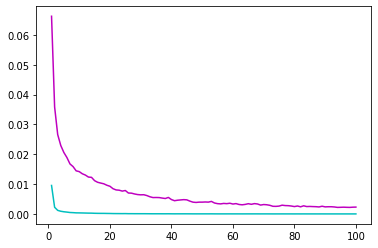

In [0]:
mse_history = history.history['loss']
mae_history = history.history['mae']

epochs = range(1,len(mse_history) +1)
plt.plot(epochs, mse_history, 'c', label='mse')
plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/train18_test6_50epo_mse_mae1.png' ,dpi=1200)

array([-2.09183895, -0.2875658 , -0.98752449])

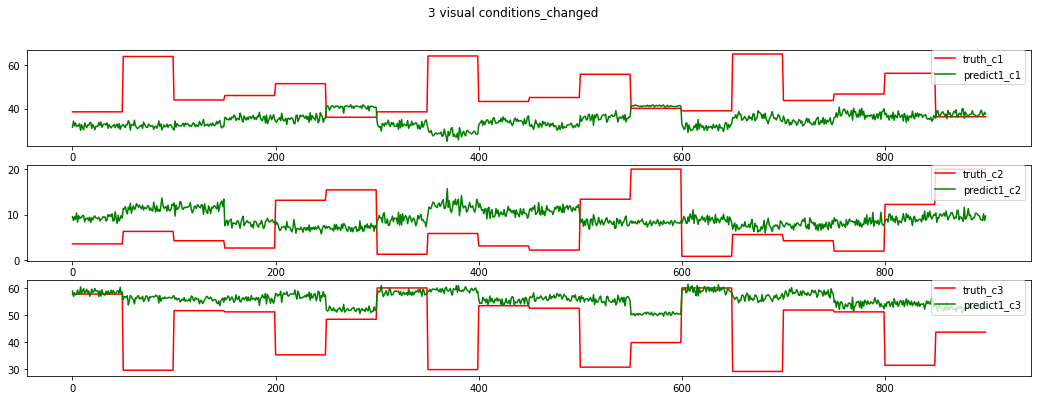

In [0]:

comparision1 = (model.predict(test_data))*100
Test_label = test_label*100
x_data = range(900)
y_data_c1 = Test_label[:,0]
y_data_c2 = Test_label[:,1]
y_data_c3 = Test_label[:,2]
y_predict1_c1 = comparision1[:,0]
y_predict1_c2 = comparision1[:,1]
y_predict1_c3 = comparision1[:,2]

fig, (predict_c1, predict_c2, predict_c3) = plt.subplots(3,figsize=(18,6))
fig.suptitle('3 visual conditions_changed') 

predict_c1.plot(x_data, y_data_c1 , 'r', label='truth_c1')
predict_c2.plot(x_data, y_data_c2 , 'r', label='truth_c2')
predict_c3.plot(x_data, y_data_c3 , 'r', label='truth_c3')
predict_c1.plot(x_data, y_predict1_c1 , 'g', label='predict1_c1')
predict_c2.plot(x_data, y_predict1_c2 , 'g', label='predict1_c2')
predict_c3.plot(x_data, y_predict1_c3 , 'g', label='predict1_c3')
predict_c1.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c2.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)
predict_c3.legend(bbox_to_anchor=(0.9, 1), loc='upper left', borderaxespad=0.)

# plt.savefig('/content/drive/My Drive/train18_test6_50epo_comparison1.png' ,dpi=1200)

r2_score(Test_label, comparision1, multioutput='raw_values')